$Danial$ $Haselibozchaloee$

$Ph.D.$ $Candidate$

$Civil$ $Engineering$ - $Structure$

$The$ $Faculty$ $of$ $Engineering$ - $The$ $Univeristy$ $of$ $Porto$ $(FEUP)$

[My Google Scholar Profile](https://scholar.google.com/citations?user=PMeOLSoAAAAJ&hl=en)

[My Linkedin Profile](https://www.linkedin.com/in/danial-haselibozchaloee-26437887/)



# Chapter 9. Application of Multi-Degree of Freedom Analysis, James F. Wilson

A fixed leg platform or jacket template structure, discussed in some detail in
    Example Problems 8.1.8.5, is shown again in Figure 9.1. As in these previous
    examples, the stalk model of this structure is used, as defined in Figure 9.2a,
    a two degree of freedom model with the lumped virtual masses  $m_1$ and $m_2$ , located by 
    the two independent horizontal displacement coordinates ($\xi_1$, $\xi_2$). The
    corresponding equation of motion for each mass, derived previously as equations 
    (8.28), are:
    

![Description of the image](./Equation.9.2.jpg)


Listed in Table 9.1 are the numerical values for the charactrisations of the structure and of the incident harmonic water wave. The analysis of the structure's dynamic response begins with a calculation of the undamped natural frequencies and mode shapes. 

![Description of the image](./Figure.9.1.jpg)

![Description of the image](./Figure.9.2.jpg)

![Description of the image](./Table.9.1.jpg)

$Frequencies$

The two undamped structural frequencies for free vibration are computed by solving the charactristic determinant, equation (8.61), for the two positive roots $\omega$ . The governing equation is:


![Description of the image](./Equation.9.3.jpg)

With the numerical values above, this determinant becomes

![Description of the image](./Equation.9.4.jpg)

which reduces to

![Description of the image](./Equation.9.5.jpg)

Using the qadratuc formula, the two positive roots $\omega ^2$ to this equation are calculated as: $\omega_1 ^2$ = 7.322 $rad ^2 / s^2$ and $\omega_2 ^2$ = 123.04 $rad ^2 / s^2$ , from which the two frequencies are deduced as

![Description of the image](./Equation.9.6.jpg)

In [34]:
import pandas as pd
import numpy as np
from scipy.linalg import eigh
# Platform Pramaters

m1,m2 = 4.69* 10**6 , 3.13* 10**6
k11,k22 = 7.35* 10**7, 3.59* 10**8
k21 = -1.15 * 10**8
k12 = k21
l1 = 38
l2 = 38
damp_ratio1 = 0.05
damp_ratio2 = 0.05
d = 61
Dl = 5.5
Dc = 4.3
Nl = 4
Nc = 2
w = 30
K = np.array([[k11, k12], [k21, k22]])
M = np.array([[m1 , 0],[0 , m2]])

# Solve the generalized eigenvalue problem K v = (w^2 M) v
# eigh solves for (K - w^2 M)v = 0 and returns the eigenvalues w^2
eigenvalues, eigenvectors = eigh(K, M)

# Compute the natural frequencies w
natural_frequencies = np.sqrt(eigenvalues)
fn = natural_frequencies/(2*np.pi)

# Print the natural frequencies
print("First Natural angular frequnecy :", natural_frequencies[0], str("(rad/s)"))
print("Second Natural angular frequnecy :", natural_frequencies[1], str("(rad/s)"))
print()
print("First Natural frequnecy :", fn[0], str("(Hz)"))
print("Second Natural frequnecy :", fn[1], str("(Hz)"))

First Natural angular frequnecy : 2.6989422285305724 (rad/s)
Second Natural angular frequnecy : 11.09431558326616 (rad/s)

First Natural frequnecy : 0.4295499967900964 (Hz)
Second Natural frequnecy : 1.7657151652982535 (Hz)


$Modal$ $Vectors$ $and$ $Normalization$

For the $n$ th  frequency $\omega_n$ there is a modal vector $\hat \xi_n$ which can be computed from equation (8.62), or

![Description of the image](./Equation.9.7.jpg)

In this case, $\boldsymbol{\hat{\xi}_n}$= [1 $\hat{\xi}_n$]$^T$  for $n$ = 1,2 and the components $\hat{\xi}_{2n}$ can be computed from the spacial case of equation (8.63) or

![Description of the image](./Equation.8.63.jpg)

![Description of the image](./Equation.9.8.jpg)

The first of these two equations, when solved for $\hat \xi_{2n}$ , gives


![Description of the image](./Equation.9.9.jpg)

The reader can verify that the same numerical results for $\hat \xi_{2n}$ can be obtained from the second of equations (9.8) as from equation (9.9). For the numerical values of this problem, then $\hat \xi_{21}$ = 0.341 and $\hat \xi_{22}$ = -4.38 , which correspond to the frequencies of $\omega_1$ = 2.706 and $\omega_2$ = 11.09 $rad/s$, respectively. These modal vectors, which have no units, thus

![Description of the image](./Equation.9.10-a-b.jpg)

Shown in Figure 9.2b and 9.2c are sketches of $\boldsymbol{\hat \xi_1} $ and  $\boldsymbol{\hat \xi_2} $ , respectively. Note that since the components  $\hat \xi_{11}$ and $\hat \xi_{12}$ were arbitrarily chosen as unity, as comparison pf magnitude between these two vectors is not meaniingful.

The normalized model vectors $\boldsymbol{x}_n$ are computed using equations (8.66) and (8.67). That is,

![Description of the image](./Equation.8.66.jpg)

![Description of the image](./Equation.8.67.jpg)

![Description of the image](./Equation.9.11.jpg)

in wchich the normalizing constants $e_n$ are computed


![Description of the image](./Equation.9.12.jpg)

For this probelem, the two normalizing constants are as follows

![Description of the image](./Solution.90.jpg)

With these results and equation (9.11), the two normalized model vectors are calculated as

![Description of the image](./Equation.9.13a-b.jpg)

The modal shape matrix $\boldsymbol{X}$, defined previously by equations (8.79) and (8.80) as the assembly of the model vectors $\boldsymbol{x}_n$, is thus

![Description of the image](./Equation.9.14.jpg)



In [53]:
import sympy as sp
# Function to solve for xihat12 given a natural frequency w_n
def solve_for_xihat12(w_n):
    # Define the matrix A as [K - w_n^2 * M]
    A = np.array([
        [k11 - w_n**2 * m1, k12],
        [k21, k22 - w_n**2 * m2]
    ])
    
    # Since we are setting xihat11 to 1, we solve for xihat12
    # Solve A @ [1, xihat12]^T = [0, 0]^T
    b = np.array([0, 0])
    A_reduced = A[:, 1]  # Select the column associated with xihat12
    xihat12 = -A[0, 0] / A[0, 1]
    
    return xihat12

# Solve for xihat12 and zitahat22 for each natural frequency
xihat_values = [solve_for_xihat12(w_n) for w_n in natural_frequencies]
xihat = np.array([np.ones(len(xihat_values)), xihat_values]).T
xihat1 = xihat[0,:]
xihat2 = xihat[1,:]
print("xihat1: ", xihat1)
print("xihat2: ", xihat2)

# The normalized modal vectors xn are computed
# xn = 1/en  *xihatn
# the normalizing constants values en**2 = xihatn.T *  M * xihatn

en1 = np.sqrt(xihat1.T .dot(M) .dot(xihat1))
en2 = np.sqrt(xihat2.T .dot(M) .dot(xihat2))
print("en1:", en1,"kg^(1/2)")
print("en2:", en2,"kg^(1/2)")

# Witht values of en the normalized modal vectors are calculated
x1 = ((1/en1) * xihat1.T)
x2 = ((1/en2) * xihat2.T)
print("x1: ", x1, "kg^-(1/2)")
print("x2: ", x2, "kg^-(1/2)")
X = (np.array([[x1],[x2]]))
print("X: ", X,"kg^-(1/2)")




xihat1:  [1.         0.34205812]
xihat2:  [ 1.         -4.38054958]
en1: 2248.604403223636 kg^(1/2)
en2: 8046.877761503224 kg^(1/2)
x1:  [0.00044472 0.00015212] kg^-(1/2)
x2:  [ 0.00012427 -0.00054438] kg^-(1/2)
X:  [[[ 0.00044472  0.00015212]]

 [[ 0.00012427 -0.00054438]]] kg^-(1/2)


$Responce$ $to$ $a$ $Harmonic$ $Wave$

Consider the steady state resposne of the structure in Figure 9.1 to plane, harmonic storm wave that has a recurrece interval of 100 years, This wave, based on studies of severe storms in the Gulf of Mexico (Mansur and Millman, 1974), has a significant wave height of $H$ = 11.6 m and a dominant wave period od $T$ = 15.4 $s$. The frequency is thus $\omega$ = 2 $\pi$/$T$ = 0.408 $rad/s$.

To determine the appropriate wave theory needed for the structural loading, first comput the two wave parameters, which are the abscissa and ordinate of Figure 3.10. These are

![Description of the image](./Figure.3.10.jpg)

![Description of the image](./Solution.91.jpg)

In [36]:
# Charactristics of an Incident Wave
# Wave Loading Parameters
H = 11.6 # Wave height (m)
T = 15.4 # Period (sec)
k = 0.0201 # Wave number (m^-1)
Lambda = 312 # Wave Length (m)
w = 0.408 # angular wave frequency (rad/sec)
Ro = 1031 # Water density (kg/m^3)
CM = 2 # Inertia coefficient
dT_2 = d * 3.28 / T**2 # 3.28 is the coefficient for converting unit from "m" to "ft"
HT_2 = (H * 3.28) / T**2 

print("d/T^2 : ", dT_2 , "ft/s^2") 
print("H/T^2 :", HT_2, "ft/s^2")
print()
print("******POINT: The Value of HT_2 is different from the book,but the used wave theory is the same as book******") 

d/T^2 :  0.8436498566368694 ft/s^2
H/T^2 : 0.16043177601619157 ft/s^2

******POINT: The Value of HT_2 is different from the book,but the used wave theory is the same as book******


These two parametrs place this wave in the region of the Stoke's second order theory, in the intermediate water depth range. As discussed in Chapter 3 in $Example$ $Problem$ $3.2$, the wave lenght $\lambda$ can be expresed in terms of the water depth $d$, the wave period $T$, and the height $H$. In this case, the dispersion relation has the following form:

![Description of the image](./Equation.9.15.jpg)

The latter equaition, implicit in $\lambda$, was solved using Mathematica $^{\textcircled{R}}$ (1999) with the subroutin RootFind, wit the result $\lambda$ = 312 m. From this, the wave number becomes $k = 2 \pi /\lambda $ = 0.0201 $m^{-1}$. These two wave paramerters are listed in Table 9.1.

![Description of the image](./Table.9.1.jpg)

In [54]:
# The results show that The Stokes 2nd order should be used.
import numpy as np
# Given values
d = 61
g = 9.81
# The value of wave lenght (lambda) can be found with a numberical solution as shown below:
    
# lambda = T * np.sqrt((g*lambda / 2*np.pi) * tanh(2*np.pi *d / lambda))

# Initial guess for lambda
lambda_guess = 100  # Initial guess can be arbitrary
tolerance = 1e-3    # Tolerance level for convergence
max_iterations = 1000  # Maximum number of iterations

def f(lambda_):
    return T * np.sqrt((g * lambda_) / (2 * np.pi) * np.tanh(2 * np.pi * d / lambda_))

def find_lambda(T, g, d, lambda_guess, tolerance, max_iterations):
    lambda_current = lambda_guess
    for i in range(max_iterations):
        lambda_next = f(lambda_current)
        if abs(lambda_next - lambda_current) < tolerance:
            return lambda_next
        lambda_current = lambda_next
    raise ValueError("Failed to converge within the maximum number of iterations")

lambda_value = round(find_lambda(T, g, d, lambda_guess, tolerance, max_iterations))
print(f"The value of wave length is: {lambda_value:.6f} m")

# The value of the wave number can be calculated with k = 2pi / lambda (m^-1)
k = round((2* np.pi) / lambda_value,4)   # (m^-1)
print(f"The value of wave number is: {k:.6f} m^-1")


The value of wave length is: 312.000000 m
The value of wave number is: 0.020100 m^-1


In computing the structural loading associated with this wave, the following assumptions are made: (1) the motion of structure is much smaller than the motion of the wave, so that Morison's equation (2.14) applies; (2) the flow is predominately in the inertia regime so that the structural loading term of Morison's equation that involves $C_M$ dominates the fluid drag term that involves $C_D$; (3) the four vertical legs ($N_l$ = 2), which are normal to flow at node point 2, account for most of the structural wave loading; (4) because of their relatively small diameter compared to the legs, the wave loading of the cross bracing is mainly fluid drag, a loading that is relatively small compared to the inertia loading on the other six memebers to which $C_M$ applies; (5) since the wave lenght $\omega$ = 312 m is much larger than the distance $w$ = 30 m between the vertical legs in the direction of wave propogation, the phase of the wave can be neglected, or $x$=0 in the expression for the wave acceleration $\dot {u}$. With these assumptions,  $\dot{u}$= $\dot{u}(z,t)$ of Table 3.2 has the form

![Description of the image](./Equation.2.14.jpg)

![Description of the image](./Equation.9.16.jpg)

The loading per unit length of the four vertical legs, and of the two cross braces normal to the wave direction are, respectively

![Description of the image](./Equation.9.17-a-b.jpg)

The respective total loads lumped at nodes 1 and 2 are computed bu integrating these loadings over the appropriate structural memebers. As a conservative measure, all of the wave loading on the four legs from the sea surface to node 2 is lumped at node 1 located at the deck level. Also, all of thw wave loading on the legs extending from node 2 to the sea floor is lumped at node 2 also. With these assumptions, the nodal loads can be expressed as follows:

![Description of the image](./Equation.9.18-a.jpg)
![Description of the image](./Equation.9.18-b.jpg)

When $\dot{u}$ of equation (9.16) is substituted into equations (9.17), and those results are integrated according to equations (9.18), the nodal loads become

![Description of the image](./Equation.9.19-a-b.jpg)

in which the coefficients of the harmonic terms are

![Description of the image](./Equation.9.20.jpg)

These coefficients, when evaluated using the system parameters of Table 9.1, lead to the following explicit results for the nodal loads, in units of newtons:

![Description of the image](./Equation.9.21-a-b.jpg)



In [38]:
import numpy as np
import matplotlib.pyplot as plt
l1 = 38
l2 = 38
d = 61
k = 0.0201
Dl = 5.5 # diemeter of the circular cross section of the vertical components (m)
Dc = 4.3 # diemeter of the circular cross section of the horizontal components (m)
Nl = 4 # four vertical legs
Nc = 2 # two horizontal cross braces
w = 30  # the distance between vertical legs (m)
H = 11.6 # wave height (m)
T = 15.4 # wave period (s)
lambda_value = 312 # wave lenght (m)
omega = 0.408 # wave angular frquency (rad/s)
ro = 1031 # water density (kg/m^3) 
Cm = 2 # inertia coefficient

# Coefficients of the harmonic terms
a1 = Nl * Cm * (np.pi/4) * (ro) * (Dl**2)
a2 = - (2* (np.pi**2) * H) / ((T**2) * (np.sinh(k*d)))
a3 = - ((3 * (np.pi**3) * (H**2)) / ((T**2) * (lambda_value) * (np.sinh((k*d))**4)))
a4 = Nc * Cm * (np.pi/4) * ro * (Dc**2)

b1 = round((1/k) * (a1*a2) * (np.sinh(k*d) - np.sinh(k*l2)))
b2 = round((1/k) * a1 *a2 * np.sinh(k * l2) + w * a2 * a4 * np.cosh(k*l2))
b3 = round(((1 / (2*k)) * a1 * a3) * (np.sinh(2*k*d) - np.sinh(2*k*l2)))
b4 = round((1 / (2*k)) * a1 * a3 * np.sinh(2*k*l1) + w * a3 * a4 * np.cosh(2*k*l2))


print("b1 = ", b1)
print("b2 = ", b2)
print("b3 = ", b3)
print("b4 = ", b4)

b1 =  -4333751
b2 =  -6533912
b3 =  -500422
b4 =  -432445



With this loading, together with the normalized vectors $x_n$, the steady state solutions to the governing equations of motion (9.2) can be computed using equations (8.96)-(8.99) and the procedure outlined in Section 8.6. The two scalar products in th eintegral solution (8.96) are cimputed using the vectors of equations (9.13) and (9.21), or

![Description of the image](./Equation.9.22-a-b.jpg)

![Description of the image](./Equation.8.96.jpg)

![Description of the image](./Equation.8.97.jpg)

![Description of the image](./Equation.8.98.jpg)

![Description of the image](./Equation.8.99.jpg)

In [39]:
import sympy as sp 

tau = sp.symbols("tau")
P = [[b1*sp.sin(omega*tau) + b3*sp.sin(2*omega*tau)], [b2*sp.sin(omega*tau) + b4*sp.sin(2*omega*tau)]]
XT1_P = (np.array((X[0]) .dot(P)))
XT2_P = (np.array(X[1] .dot(P)))
print(X[0])
print(X[1])
print(P[0])
print(P[1])
print()
print("The values of transposed X1 * P(t) = ", XT1_P)
print()
print("The values of transposed X2 * P(t) = ", XT2_P)


[[0.00044472 0.00015212]]
[[ 0.00012427 -0.00054438]]
[-4333751*sin(0.408*tau) - 500422*sin(0.816*tau)]
[-6533912*sin(0.408*tau) - 432445*sin(0.816*tau)]

The values of transposed X1 * P(t) =  [[-2921.24690749433*sin(0.408*tau) - 288.331430396227*sin(0.816*tau)]]

The values of transposed X2 * P(t) =  [[3018.36006122044*sin(0.408*tau) + 173.225542064428*sin(0.816*tau)]]


The undamped and damped frquenceis are


$\omega_1$ = 2.7060 rad/s;

$\omega_{d1}$ = 2.7026 rad/s;

$\omega_2$ = 11.090 rad/s;

$\omega_{d2}$ = 11.076 rad/s;


In [40]:
print("Natural Frequencies (rad/s) = ", natural_frequencies)
print()
print("Mass Matrix = ", M)
print()
print("Stiffness Matrix = ", K)
dc1 = damp_ratio1
dc2 = damp_ratio2
 

a2 = (2*(dc1+dc2)) * (1/((1/natural_frequencies[0])+((natural_frequencies[1]+natural_frequencies[1])/(natural_frequencies[0]*natural_frequencies[1])))) + (dc1/natural_frequencies[0])
a1 = (2/natural_frequencies[0]) * (a2/(2*natural_frequencies[0]) - dc1)
print(a1)
print(a2)

"""
w1 = natural_frequencies[0]
w2 = natural_frequencies[1]
a1 = (2 * dc1 * w2 - 2 * dc2 * w1) / (w1 * w2)
a2 = (dc2 - w2 * a1) / (0.5 * w2)
print("a1 = ", a1)
print("a2 = ", a2)
"""
DCS = ((natural_frequencies / 2) * a1) + (a2 / (2 * natural_frequencies))
print("DCS = ", DCS)
damped_frequencies = (np.array(natural_frequencies * np.sqrt(1 - (DCS**2))))
print()
print("First Natural Frequency = ", natural_frequencies[0],"(rad/s)") 
print("Seconde Natural Frequency = ", natural_frequencies[1], "(rad/s)")
print()
print("First Damped Frequency = ", damped_frequencies[0],"(rad/s)") 
print("Seconde Damped Frequency = ", damped_frequencies[1], "(rad/s)")
print()
print("****** POINT: There is a small difference between the calculated frequencies and the frecuencies obtained in the book ******")


Natural Frequencies (rad/s) =  [ 2.69894223 11.09431558]

Mass Matrix =  [[4690000.       0.]
 [      0. 3130000.]]

Stiffness Matrix =  [[ 7.35e+07 -1.15e+08]
 [-1.15e+08  3.59e+08]]
-0.009807266452608864
0.1984552582122715
DCS =  [ 0.02353075 -0.04545845]

First Natural Frequency =  2.6989422285305724 (rad/s)
Seconde Natural Frequency =  11.09431558326616 (rad/s)

First Damped Frequency =  2.6981949277688244 (rad/s)
Seconde Damped Frequency =  11.082846617146137 (rad/s)

****** POINT: There is a small difference between the calculated frequencies and the frecuencies obtained in the book ******


With the results, $y_1$ = $y_1(t)$ and $y_2$ = $y_2(t)$ were computed by the numerical integration of equation (8.96) at each of the following times $t$ = 0.2, 0.4, 0.6, ..., 30.0 s. For each of these times, the structural displacements $\xi_1$ and $\xi_2$ were calculated using the transformation of equation (8.99), or equivalently equation (8.91). That is

$\xi_1(t)$ = $x_{11}y_1$ + $x_{12}y_2$ = 4.45 $\times$ $10^{-4} y_1$ + 1.24 $\times$ $10^{-4}y_2$  m

$\xi_2(t)$ = $x_{21}y_1$ + $x_{22}y_2$ = 1.52 $\times$ $10^{-4} y_1$ - 5.44 $\times$ $10^{-4}y_2$  m

$Integration$ $of$ $equation$ $(8.96)$

Step-by-Step Solution


To integrate the given function $𝑦$ with respect to $\tau $, we can proceed step-by-step. The function is:

$x^T$ $\bold P(t)$ = $c_1 sin(\omega \tau)$ + $c_2 sin(2\omega\tau)$

$y$ = $\int (\frac{x^T \bold P(t)} {\omega_d} ) \exp^ {-\xi \omega(t-\tau)} d\tau$


$1.$ $Define$ $the$ $integrand:$


The integrand is the function inside the integral that we need to integrate with respect to $\tau$.


integrand $(\tau, t) = (\frac{c_1 sin(\omega \tau) + c_2 sin(2\omega \tau )} {\omega_d}) \exp^{(-\xi\omega(t-\tau)} $


$2.$ $Set$ $up$ $the$ $integral:$

We need to integrate the integrand from $\tau =0$ to $\tau=t$ for each time point $t.$


$3.$ $Evaluate$ $the$ $integral$ $for$ $each$ $time$ $point:$

Use numerical integration to compute the integral at each time point 
$t$.

C:\Users\Dr.Haselit Chie\AppData\Local\Temp\ipykernel_10384\4123436656.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(integrand, 0.2, t, args=(t, xi, omega, omega_d, c1, c2))


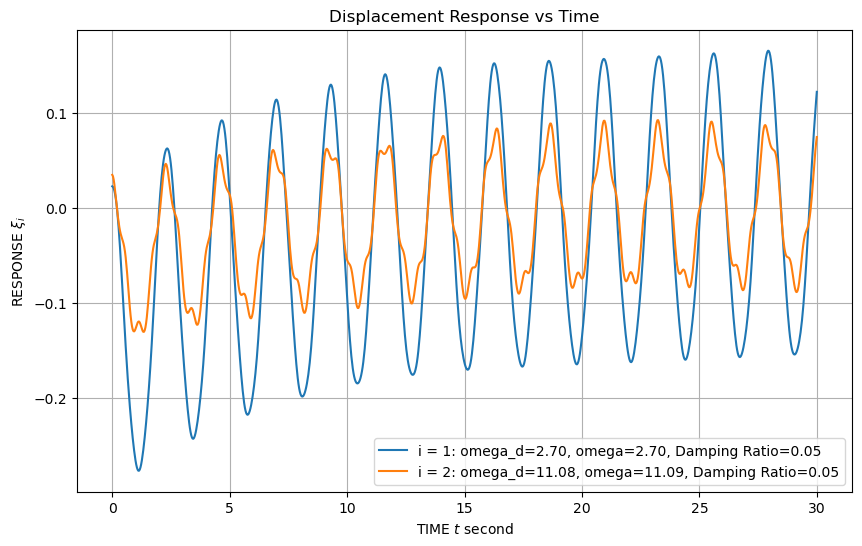

Maximum displacement of structure - First Mode:  0.2762758146290364 (m)
Maximum displacement of structure - Second Mode:  0.13003469011967927 (m)


In [58]:
import numpy as np

from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define the integrand
def integrand(tau, t, xi, omega, omega_d, c1, c2):
    term1 = c1 * np.sin(omega * tau)
    term2 = c2 * np.sin(2 * omega * tau)
    return ((1/omega_d) * (term1 + term2) ) * (np.exp(-xi * omega * (t - tau)))

# Function to compute the displacement response at a given time t
def displacement_response(t, xi, omega, omega_d, c1, c2):
    integral_result, _ = quad(integrand, 0.2, t, args=(t, xi, omega, omega_d, c1, c2))
    return integral_result

# Constants (example values)

c1 = -2921.24  # Coefficient for sin(omega * tau)
c2 = -288.33 # Coefficient for sin(2 * omega * tau)
c3 = 3018.36  # Coefficient for sin(omega * tau)
c4 = 173.22 # Coefficient for sin(2 * omega * tau)

# Time points for evaluation
time_points = np.linspace(0, 30, 1000)

# Plot the results
plt.figure(figsize=(10, 6))

y1 = np.array([displacement_response(t, damp_ratio1, natural_frequencies[0], damped_frequencies[0], c1=c1, c2=c2) for t in time_points])
y2 = np.array([displacement_response(t, damp_ratio2, natural_frequencies[1], damped_frequencies[1], c1=c3, c2=c4) for t in time_points])
x11 = round(X.T[0][0][0],4)
x12 = round(X.T[0][0][1],4)
x21 = round(X.T[1][0][0],4)
x22 = round(X.T[1][0][1],4)

response_1 = (x11 * y1) + (x12 * y2)
response_2 = (x21 * y1) + (x22 * y2)

# Plot the displacement response
plt.plot(time_points, response_1, label=f'i = {1}: omega_d={damped_frequencies[0]:.2f}, omega={natural_frequencies[0]:.2f}, Damping Ratio={damp_ratio1:.2f}')
plt.plot(time_points, response_2, label=f'i = {2}: omega_d={damped_frequencies[1]:.2f}, omega={natural_frequencies[1]:.2f}, Damping Ratio={damp_ratio2:.2f}')
# Add labels and legend
plt.xlabel('TIME $t$ second')
plt.ylabel(r'RESPONSE $\xi_i$')
plt.title('Displacement Response vs Time')
plt.legend()
plt.grid(True)
plt.show()

print("Maximum displacement of structure - First Mode: ",max(np.abs(response_1)), "(m)")

print("Maximum displacement of structure - Second Mode: ",max(np.abs(response_2)), "(m)")